In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm

Questão 1

In [ ]:
acoes = []
for i in range(3):
  A1 = np.random.normal(10,0.8,100)
  A2 = np.random.normal(2.7,0.8,100)
  A3 = np.random.normal(8,0.8,100)
  A4 = np.random.normal(7,0.8,100)
  A5 = np.random.normal(9,0.8,100)
  acao = [A1,A2,A3,A4,A5]
  acoes.append(acao)
nomes = ["A1","A2","A3","A4","A5"]

In [ ]:
class Markowitz():

  def __init__(self,acoes,nomes): # recebe uma lista com ações para criar o objeto em função dessas ações
    self.nomes = nomes # nomes das ações
    self.retorno = [np.mean([(acoes[j][i+1]-acoes[j][i])/acoes[j][i] for i in range(0,len(acoes[j])-1)]) for j in range(len(acoes))] #fazendo o retorno médio de cada acao
    self.risco  =  np.cov(acoes)

  def gerando_prob(self,n): # função que gera pesos uniformes
    probs = [0]
    for i in range(n-1):
      probs.append(np.random.uniform(0,1))
    probs.append(1)
    prob = []
    for i in range(n):
      prob.append(np.sort(probs)[i+1]-np.sort(probs)[i])
    return prob

  def mark(self,n,m, mod=False): # função que recebe n número de carteiras geradas e m número de ações e retorna o retorno médio e o risco de cada carteira
    retorno_medio = []
    riscor = []

    if mod:
      composicaoC = []
      retorno_medio = []
      riscor = []

      for i in range(n):
        probs = self.gerando_prob(m)
        retorno_medio.append(np.sum([self.retorno[i]*probs[i] for i in range(m)]))
        riscor.append(np.array(probs)@self.risco@np.array(probs))
        composicaoC.append(probs)
      return retorno_medio, riscor, composicaoC

    for i in range(n):
      probs = self.gerando_prob(m)
      retorno_medio.append(np.sum([self.retorno[i]*probs[i] for i in range(m)]))
      riscor.append(np.dot(np.array(probs),np.dot(self.risco,np.array(probs))))
    return retorno_medio,riscor

  def balaMarkowitz(self,n, mod=False):
    retorno_medio,riscor=self.mark(n,len(self.retorno))

    if mod:
      retorno_medio,riscor, compC =self.mark(n,len(self.retorno), mod)
      ativ_eixo_x = np.sqrt(np.diagonal(self.risco))
      ativ_eixo_y = self.retorno
      cart_eixo_x = np.sqrt(riscor)
      cart_eixo_y = retorno_medio
      return ativ_eixo_x, ativ_eixo_y, cart_eixo_x, cart_eixo_y, compC

    plt.plot(np.sqrt(np.diagonal(self.risco)),self.retorno,'o',color="red")
    plt.plot(np.sqrt(riscor),retorno_medio,"o",color="blue")
    plt.tight_layout()
    plt.suptitle('Bala de Markowitz', fontsize=15)
    plt.xticks(fontsize=10, rotation=45)
    plt.yticks(fontsize=10)
    plt.xlabel("Risco")
    plt.ylabel("Retorno")

    plt.show

  def __str__(self):
    return f"O DataFrame tem riscos^2\covariância \n {pd.DataFrame(self.risco,self.nomes,columns = self.nomes)} \n e retornos médios {self.retorno}"

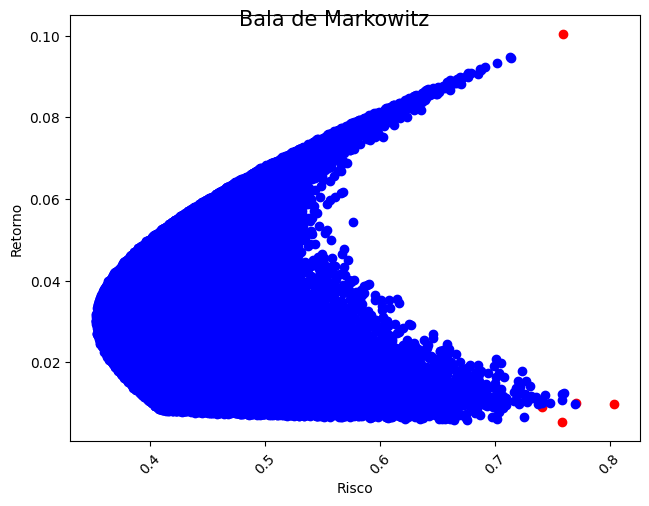

In [ ]:
markinhos1 = Markowitz(acoes[0],nomes)
markinhos1.balaMarkowitz(100000)

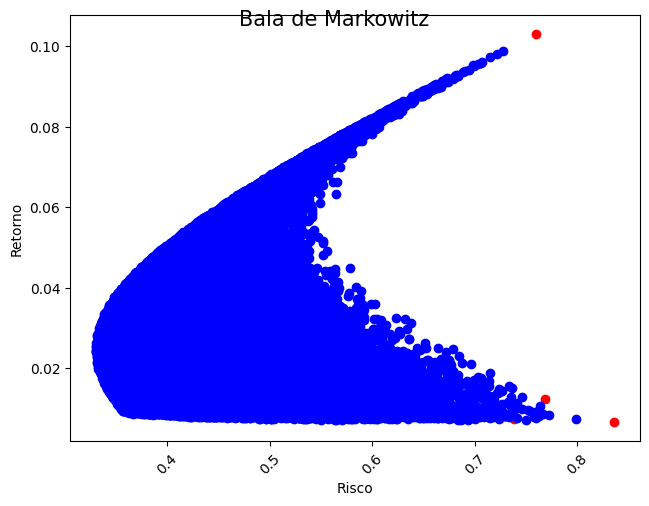

In [ ]:
markinhos2 = Markowitz(acoes[1],nomes)
markinhos2.balaMarkowitz(100000)

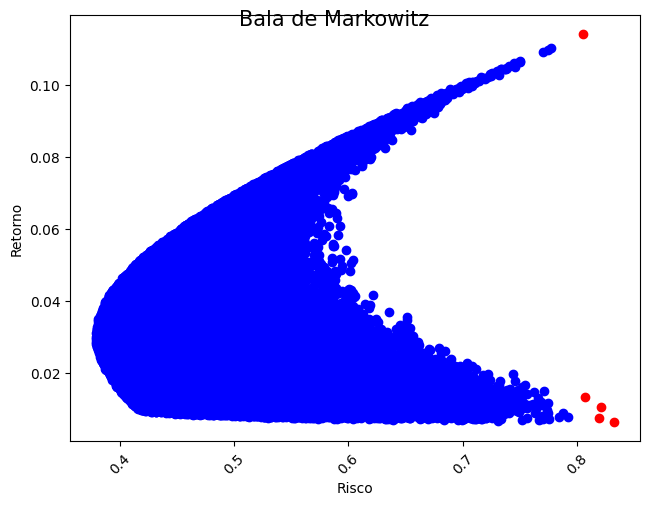

In [ ]:
markinhos3 = Markowitz(acoes[2],nomes)
markinhos3.balaMarkowitz(100000)

Questão 2

In [ ]:
import yfinance as yf
import pandas_datareader.data as web
yf.pdr_override()

B1 = web.get_data_yahoo(['NEE'], start = '2023-01-01',end = "2023-03-03")
B2 = web.get_data_yahoo(['XOM'], start = '2023-01-01',end = "2023-03-03")
B3 = web.get_data_yahoo(['MSFT'], start = '2023-01-01',end = "2023-03-03")
B4 = web.get_data_yahoo(['AAPL'], start = '2023-01-01',end = "2023-03-03")
B5 = web.get_data_yahoo(['^BVSP'], start = '2023-01-01',end = "2023-03-02")

[*********************100%%**********************]  1 of 1 completed

ERROR:yfinance:
1 Failed download:
ERROR:yfinance:['NEE']: ValueError("time data '2023-13-13' does not match format '%Y-%m-%d'")



[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
dados = pd.DataFrame({"NextEra Energy":list(B1.Open),"Exxon Mobil Corporation":list(B2.Open),"MICROSOFT":list(B3.Open),"APPLE":list(B4.Open),"IBOVESPA":list(B5.Open)})
dados.describe()

,NextEra Energy,Exxon Mobil Corporation,MICROSOFT,APPLE,IBOVESPA
count,41.000000,41.000000,41.000000,41.000000,41.000000
mean,78.016342,112.393171,248.000245,142.634878,109668.658537
std,4.884039,2.852690,13.729851,8.722488,2629.816682
min,70.360001,104.800003,223.000000,126.010002,104167.000000
25%,74.599998,110.620003,237.000000,134.830002,107849.000000
50%,75.650002,112.099998,248.000000,144.380005,109599.000000
75%,83.610001,114.720001,258.820007,150.089996,112041.000000
max,85.930000,117.720001,273.799988,153.880005,114271.000000


In [ ]:
dados

,NextEra Energy,Exxon Mobil Corporation,MICROSOFT,APPLE,IBOVESPA
0,84.370003,109.779999,243.080002,130.279999,109734.0
1,84.360001,104.800003,232.279999,126.889999,106377.0
2,83.610001,106.339996,227.199997,127.129997,104167.0
3,83.559998,110.080002,223.000000,126.010002,105336.0
4,83.639999,111.639999,226.449997,130.470001,107642.0
5,84.070000,109.790001,227.759995,130.259995,108964.0
6,84.470001,110.989998,231.289993,131.250000,109129.0
7,85.099998,111.820000,235.259995,133.880005,110816.0
8,84.440002,113.110001,237.000000,132.029999,112516.0
9,85.190002,113.410004,237.970001,134.830002,111843.0


In [ ]:
covariancia_dados = dados.cov()

In [ ]:
correlacao_dados = dados.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

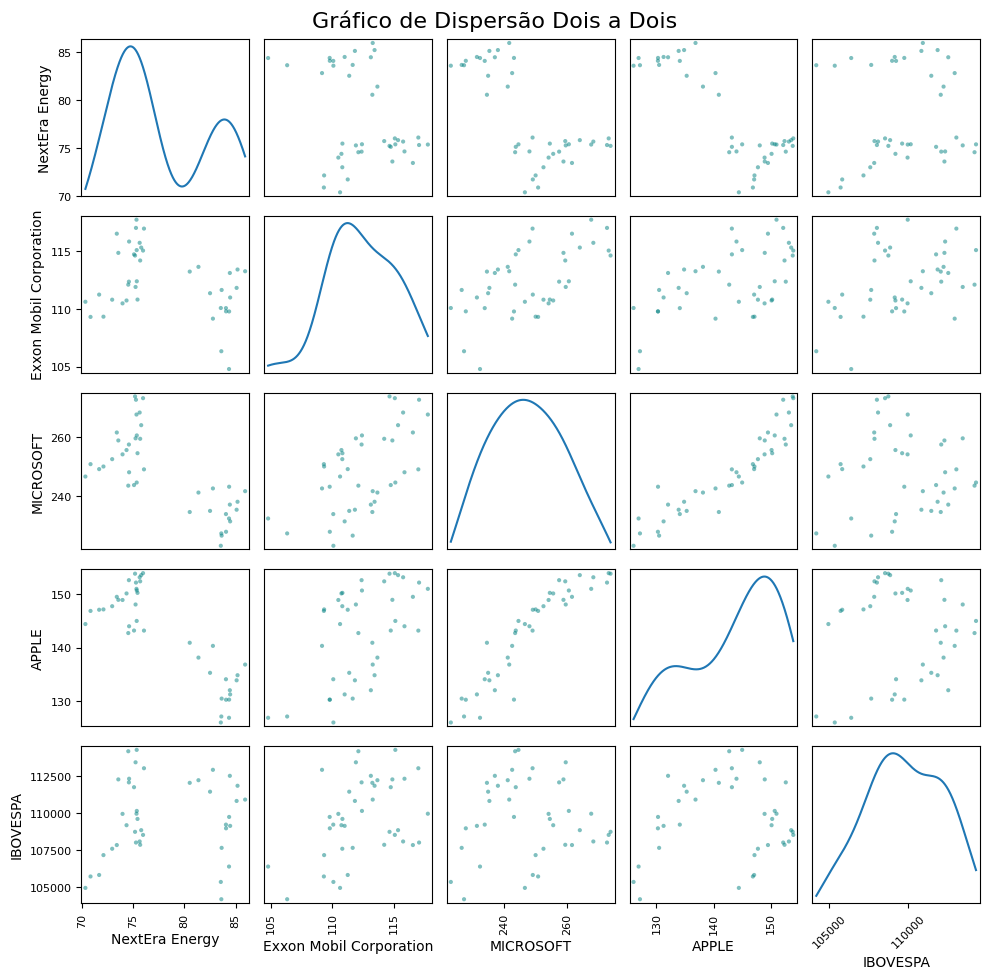

In [ ]:
pd.plotting.scatter_matrix(dados,figsize=(10, 10), diagonal='kde', color='teal')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Gráfico de Dispersão Dois a Dois', fontsize=16)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

# Crie um objeto StandardScaler
scaler = StandardScaler()

# Ajuste o scaler aos dados e normalize-os
dados_normalizados = scaler.fit_transform(dados)
dadosNormais = pd.DataFrame(dados_normalizados)

In [ ]:
correlacao_dados

,NextEra Energy,Exxon Mobil Corporation,MICROSOFT,APPLE,IBOVESPA
NextEra Energy,1.000000,-0.333016,-0.705938,-0.841143,0.105256
Exxon Mobil Corporation,-0.333016,1.000000,0.588470,0.559005,0.407306
MICROSOFT,-0.705938,0.588470,1.000000,0.926808,0.023420
APPLE,-0.841143,0.559005,0.926808,1.000000,0.080241
IBOVESPA,0.105256,0.407306,0.023420,0.080241,1.000000


Questão 3

In [ ]:
B1 = web.get_data_yahoo(['PETR4.SA'], start = '2023-01-01',end = "2023-03-03")
B2 = web.get_data_yahoo(['BBDC4.SA'], start = '2023-01-01',end = "2023-03-03")
B3 = web.get_data_yahoo(['ABEV3.SA'], start = '2023-01-01',end = "2023-03-03")
B4 = web.get_data_yahoo(['BBAS3.SA'], start = '2023-01-01',end = "2023-03-03")
B5 = web.get_data_yahoo(['B3SA3.SA'], start = '2023-01-01',end = "2023-03-03")
B6 = web.get_data_yahoo(['SUZB3.SA'], start = '2023-01-01',end = "2023-03-03")
B7 = web.get_data_yahoo(['MGLU3.SA'], start = '2023-01-01',end = "2023-03-03")
B8 = web.get_data_yahoo(['BRAP4.SA'], start = '2023-01-01',end = "2023-03-03")
B9 = web.get_data_yahoo(['ITUB4.SA'], start = '2023-01-01',end = "2023-03-03")
B10 = web.get_data_yahoo(['VALE3.SA'], start = '2023-01-01',end = "2023-03-03")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
acoes10 = [list(B1.Open),list(B2.Open),list(B3.Open),list(B4.Open),list(B5.Open),list(B6.Open),list(B7.Open),list(B8.Open),list(B9.Open),list(B10.Open)]
nomesAcoes = ["Petrobras", "BancoBradesco", "Ambev","BancodoBrasil","B3","Suzano","MagazineLuiza", "Bradespar","Itaú","Vale"]

In [ ]:
dados1 = pd.DataFrame({"Petrobras":acoes10[0], "BancoBradesco":acoes10[1], "Ambev":acoes10[2],"BancodoBrasil":acoes10[3],"B3":acoes10[4],"Suzano":acoes10[5],"MagazineLuiza":acoes10[6], "Bradespar":acoes10[7],"Itaú":acoes10[8],"Vale":acoes10[9]})
dados1

,Petrobras,BancoBradesco,Ambev,BancodoBrasil,B3,Suzano,MagazineLuiza,Bradespar,Itaú,Vale
0,23.540001,14.90,14.40,34.220001,12.79,48.240002,2.65,29.500000,24.430000,88.680000
1,22.940001,14.76,14.16,33.259998,12.19,48.599998,2.60,29.719999,24.490000,89.400002
2,21.959999,14.15,14.28,32.830002,12.10,50.000000,2.59,29.680000,24.059999,89.300003
3,23.340000,14.11,14.27,33.290001,12.03,49.959999,2.58,29.840000,24.100000,89.459999
4,23.940001,14.66,14.30,34.650002,12.25,50.560001,2.67,30.610001,24.930000,91.000000
5,23.500000,14.31,14.29,34.730000,12.50,49.750000,2.68,30.540001,25.000000,91.529999
6,23.950001,14.51,14.26,34.500000,12.31,50.509998,2.79,31.000000,25.129999,92.489998
7,24.150000,15.00,14.51,35.299999,12.85,50.049999,3.07,31.760000,25.879999,93.989998
8,24.290001,15.31,13.80,35.570000,13.50,49.250000,2.70,31.790001,25.500000,93.480003
9,24.440001,14.97,14.00,35.500000,13.01,50.340000,3.16,31.860001,25.610001,93.690002


In [ ]:
dados1.cov()

,Petrobras,BancoBradesco,Ambev,BancodoBrasil,B3,Suzano,MagazineLuiza,Bradespar,Itaú,Vale
Petrobras,1.567837,-0.397572,-0.403233,3.217785,-0.256489,-1.440909,0.591215,-0.139980,0.581179,-0.080172
BancoBradesco,-0.397572,0.432976,0.207767,-1.154407,0.402825,0.808247,-0.186510,0.608049,-0.028924,1.291558
Ambev,-0.403233,0.207767,0.217223,-1.062171,0.172851,0.572638,-0.203907,0.271363,-0.163268,0.676151
BancodoBrasil,3.217785,-1.154407,-1.062171,8.166141,-0.980597,-3.977462,1.388348,-1.031777,1.245736,-1.689921
B3,-0.256489,0.402825,0.172851,-0.980597,0.797972,0.538421,0.034891,1.189544,-0.115738,2.481117
Suzano,-1.440909,0.808247,0.572638,-3.977462,0.538421,3.529411,-0.792950,0.710994,-0.109832,1.373157
MagazineLuiza,0.591215,-0.186510,-0.203907,1.388348,0.034891,-0.792950,0.377201,0.141902,0.162375,0.320359
Bradespar,-0.139980,0.608049,0.271363,-1.031777,1.189544,0.710994,0.141902,2.153311,-0.108379,4.825641
Itaú,0.581179,-0.028924,-0.163268,1.245736,-0.115738,-0.109832,0.162375,-0.108379,0.509482,-0.239686
Vale,-0.080172,1.291558,0.676151,-1.689921,2.481117,1.373157,0.320359,4.825641,-0.239686,11.587008


In [ ]:
dados1.corr()

,Petrobras,BancoBradesco,Ambev,BancodoBrasil,B3,Suzano,MagazineLuiza,Bradespar,Itaú,Vale
Petrobras,1.000000,-0.482540,-0.690958,0.899287,-0.229310,-0.612541,0.768792,-0.076184,0.650272,-0.018810
BancoBradesco,-0.482540,1.000000,0.677471,-0.613929,0.685315,0.653824,-0.461513,0.629728,-0.061584,0.576629
Ambev,-0.690958,0.677471,1.000000,-0.797504,0.415169,0.653997,-0.712348,0.396775,-0.490777,0.426191
BancodoBrasil,0.899287,-0.613929,-0.797504,1.000000,-0.384139,-0.740878,0.791049,-0.246050,0.610735,-0.173729
B3,-0.229310,0.685315,0.415169,-0.384139,1.000000,0.320831,0.063597,0.907473,-0.181518,0.815958
Suzano,-0.612541,0.653824,0.653997,-0.740878,0.320831,1.000000,-0.687239,0.257906,-0.081906,0.214725
MagazineLuiza,0.768792,-0.461513,-0.712348,0.791049,0.063597,-0.687239,1.000000,0.157452,0.370398,0.153237
Bradespar,-0.076184,0.629728,0.396775,-0.246050,0.907473,0.257906,0.157452,1.000000,-0.103473,0.966086
Itaú,0.650272,-0.061584,-0.490777,0.610735,-0.181518,-0.081906,0.370398,-0.103473,1.000000,-0.098649
Vale,-0.018810,0.576629,0.426191,-0.173729,0.815958,0.214725,0.153237,0.966086,-0.098649,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

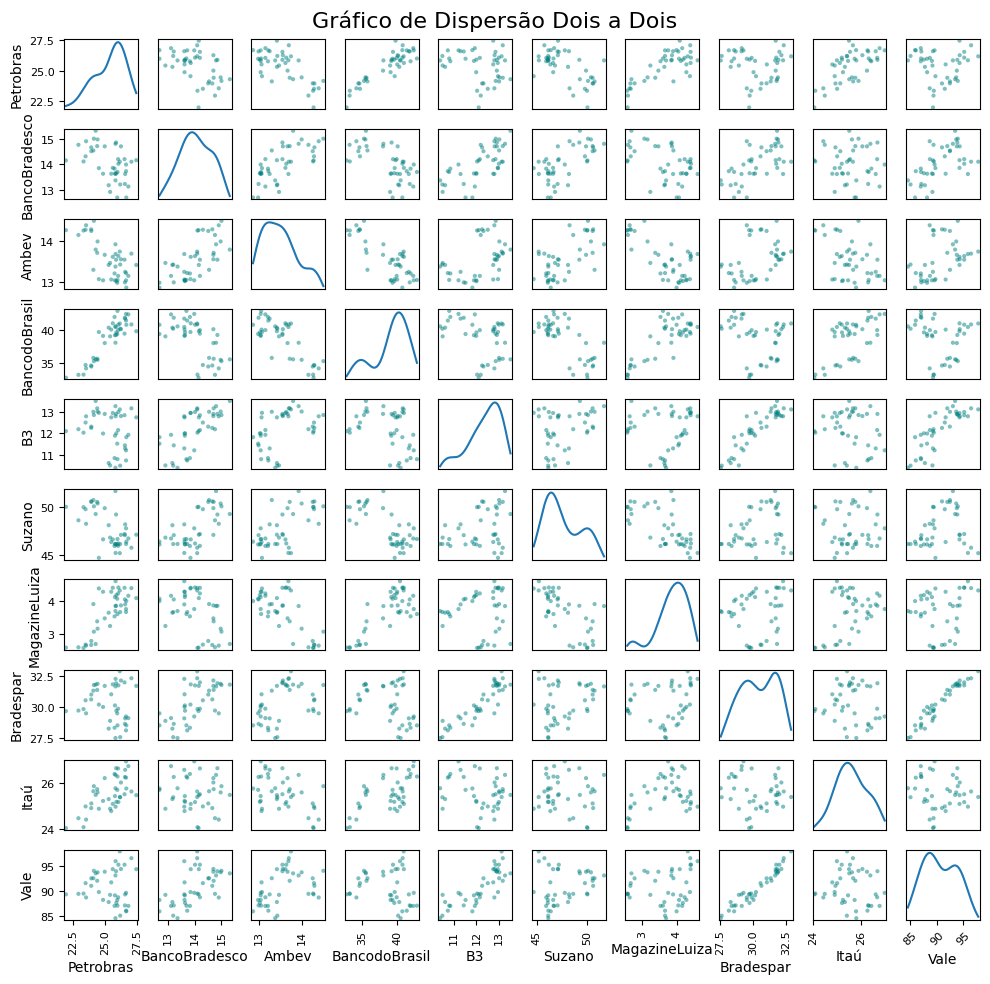

In [ ]:
pd.plotting.scatter_matrix(dados1,figsize=(10, 10), diagonal='kde', color='teal')

plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Gráfico de Dispersão Dois a Dois', fontsize=16)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)

plt.show

In [ ]:
markinhooos = Markowitz(acoes10,nomesAcoes)

In [ ]:
print(markinhooos)

O DataFrame tem riscos^2\covariância 
                Petrobras  BancoBradesco     Ambev  BancodoBrasil        B3  \
Petrobras       1.567837      -0.397572 -0.403233       3.217785 -0.256489   
BancoBradesco  -0.397572       0.432976  0.207767      -1.154407  0.402825   
Ambev          -0.403233       0.207767  0.217223      -1.062171  0.172851   
BancodoBrasil   3.217785      -1.154407 -1.062171       8.166141 -0.980597   
B3             -0.256489       0.402825  0.172851      -0.980597  0.797972   
Suzano         -1.440909       0.808247  0.572638      -3.977462  0.538421   
MagazineLuiza   0.591215      -0.186510 -0.203907       1.388348  0.034891   
Bradespar      -0.139980       0.608049  0.271363      -1.031777  1.189544   
Itaú            0.581179      -0.028924 -0.163268       1.245736 -0.115738   
Vale           -0.080172       1.291558  0.676151      -1.689921  2.481117   

                 Suzano  MagazineLuiza  Bradespar      Itaú       Vale  
Petrobras     -1.440909      

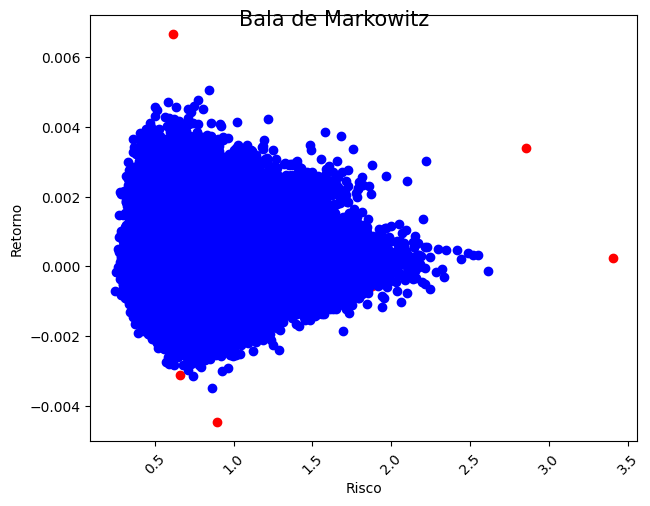

In [ ]:
markinhooos.balaMarkowitz(100000)

In [ ]:
ativ_eixo_x, ativ_eixo_y, cart_eixo_x, cart_eixo_y, compC = markinhooos.balaMarkowitz(10000, mod = True)

In [ ]:
### Truncando os riscos
cart_eixo_x_trun, cart_ot_eixo_x, cart_ot_eixo_y , compC_ot = [], [], [], []

for i in cart_eixo_x:
  cart_eixo_x_trun.append(round(i, 2))

for risc in set(cart_eixo_x_trun): # Analisando para todos os riscos distintos da Bala de markowitz
  idx_eq = [i for i, item in enumerate(cart_eixo_x_trun) if item == risc] # Indices dos riscos que são iguais

  values = [cart_eixo_y[i] for i in idx_eq ]
  max_value = max(values)
  idx_max_value = values.index(max_value)

  compC_ot.append(compC[idx_eq[idx_max_value]])
  cart_ot_eixo_x.append(cart_eixo_x_trun[idx_eq[idx_max_value]])
  cart_ot_eixo_y.append(max_value)

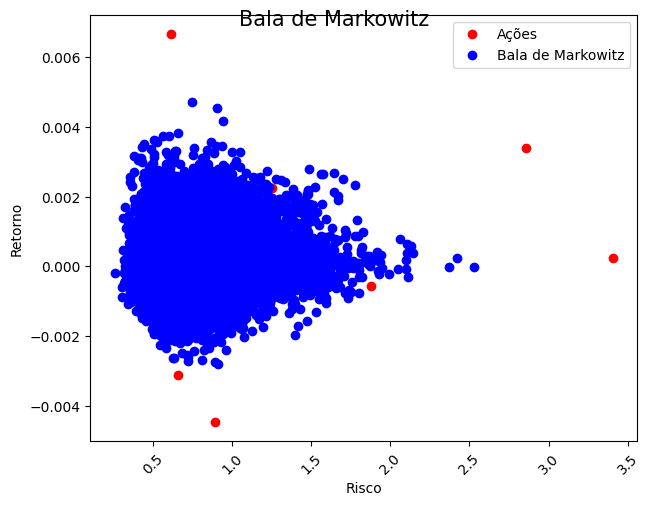

In [ ]:
plt.plot(ativ_eixo_x,ativ_eixo_y,'o',color="red", label = 'Ações')
plt.plot(cart_eixo_x,cart_eixo_y,"o",color="blue", label = 'Bala de Markowitz')
plt.tight_layout()
plt.suptitle('Bala de Markowitz', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.legend()
plt.show()

In [ ]:
cart_eixo_x

array([0.50150112, 0.49783266, 0.86278926, ..., 1.24685482, 0.78292734,
       0.68304702])

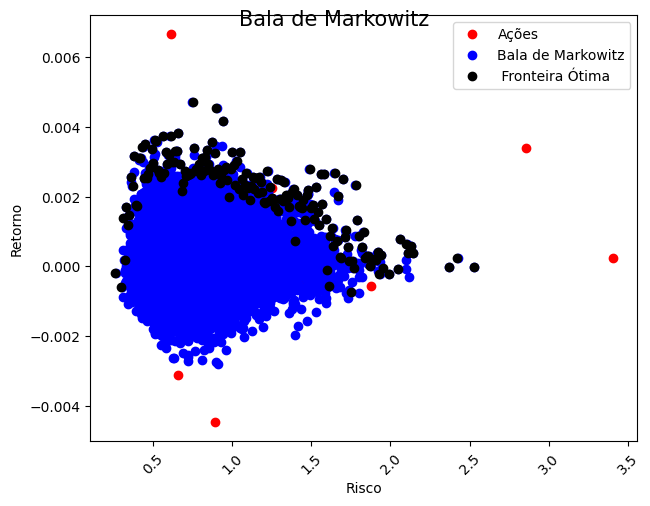

In [ ]:
plt.plot(ativ_eixo_x,ativ_eixo_y,'o',color="red", label = 'Ações')
plt.plot(cart_eixo_x,cart_eixo_y,"o",color="blue", label = 'Bala de Markowitz')
plt.plot(cart_ot_eixo_x, cart_ot_eixo_y, 'o', color='black', label = ' Fronteira Ótima')
plt.tight_layout()
plt.suptitle('Bala de Markowitz', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.legend()
plt.show()

In [ ]:
def conc_prob(compC_ot, n): # retorna o vetor de prob com as n maiores probs (distribuição)

  dist_prob = []

  for comp in compC_ot:
    aux = []

    for i in range(n):
      max_value_comp = max(comp)
      aux.append(max_value_comp)
      comp.remove(max_value_comp)

    dist_prob.append(aux)

  return dist_prob

conc_compC_ot = conc_prob(compC_ot, 5)
eixo_x, eixo_y = [], []

for idx, comp in enumerate(conc_compC_ot):
  if idx % 5 == 0:
    for probs in comp:
      eixo_x.append(cart_ot_eixo_x[idx])
      eixo_y.append(probs)

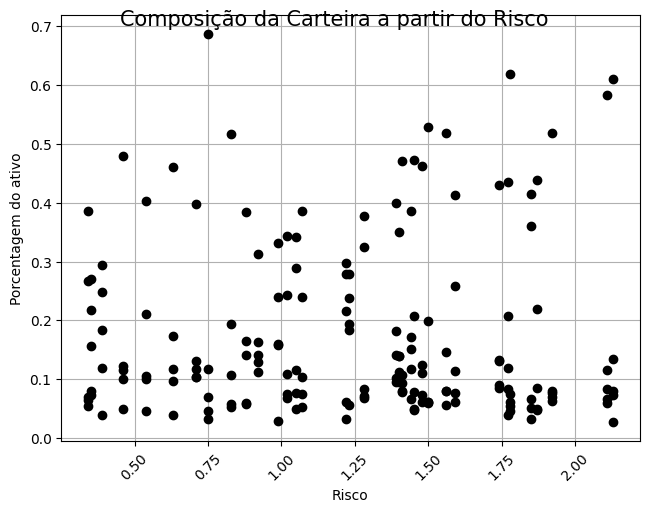

In [ ]:
plt.plot(eixo_x, eixo_y, 'o', color='black')
plt.tight_layout()
plt.suptitle('Composição da Carteira a partir do Risco', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Risco")
plt.ylabel("Porcentagem do ativo")
plt.grid()
plt.show()

Questão 4

In [ ]:
C1 = web.get_data_yahoo(['ITUB4.SA'], start = '2018-01-01',end = "2023-06-15")
price_itau = C1['Open']
price_itau

[*********************100%***********************]  1 of 1 completed


Date
2018-01-02    28.533333
2018-01-03    29.266666
2018-01-04    29.500000
2018-01-05    30.080000
2018-01-08    30.040001
                ...    
2023-06-07    27.500000
2023-06-09    27.570000
2023-06-12    27.930000
2023-06-13    27.639999
2023-06-14    27.969999
Name: Open, Length: 1351, dtype: float64

In [ ]:
retorno_1 = []

for i in range(0,len(price_itau)-1):
  calc_retorno = (price_itau[i+1] - price_itau[i])/price_itau[i]
  retorno_1.append(calc_retorno)

retorno_1 = np.array(retorno_1)

In [ ]:
price_itau_15 = [price_itau[0]]

for i in range(1, len(price_itau)):
  if i % 15 == 0:
    price_itau_15.append(price_itau[i-1])

retorno_15 = []
for i in range(0,len(price_itau_15)-1):
  calc_retorno = (price_itau_15[i+1] - price_itau_15[i])/price_itau_15[i]
  retorno_15.append(calc_retorno)

retorno_15 = np.array(retorno_15)

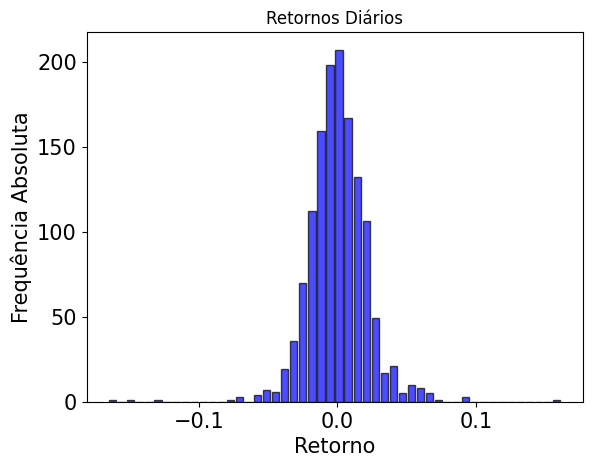

In [ ]:
plt.title('Retornos Diários')
plt.xlabel('Retorno', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=15)
plt.hist(retorno_1, 50, rwidth=0.8, color='blue', alpha=0.7, edgecolor='black')
plt.show()

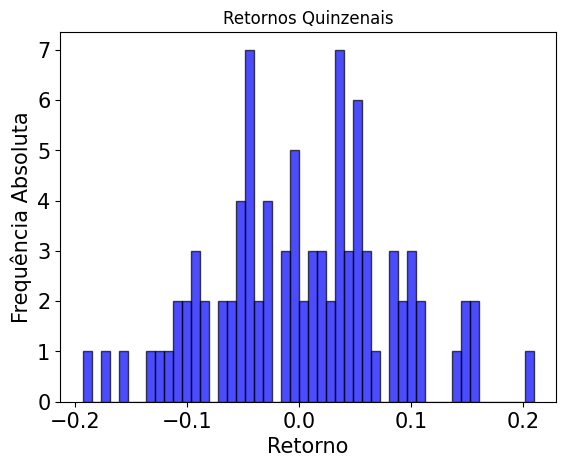

In [ ]:
plt.title('Retornos Quinzenais')
plt.xlabel('Retorno', fontsize=15)
plt.ylabel('Frequência Absoluta', fontsize=15)
plt.tick_params(labelsize=15)
plt.hist(retorno_15, 50, rwidth=1.5, color='blue', alpha=0.7, edgecolor='black')
plt.show()

## Método Histórico

In [ ]:
ord_retorno_1 = retorno_1.copy()
ord_retorno_1.sort()
ord_retorno_15 = retorno_15.copy()
ord_retorno_15.sort()

In [ ]:
ord_retorno_1, retorno_1

(array([-0.16546758, -0.15006871, -0.12769118, ...,  0.09274347,
         0.0958333 ,  0.16120688]),
 array([ 0.02570094,  0.00797267,  0.01966101, ...,  0.01305769,
        -0.01038313,  0.01193922]))

Nível de confiança $ P = 90\% $

In [ ]:
ret1_10 = ord_retorno_1[0:int(len(ord_retorno_1)/10)]
ret15_10 = ord_retorno_15[0:int(len(ord_retorno_15)/10)]

Análise VaR

In [ ]:
ret1_10[-1], ret15_10[-1]

(-0.022701757423065235, -0.10403979527189337)

Série diária: 10% dos retornos são menores que $-2.27\% $ -> VaR é de $2.27\%$ do investimento com nível de confiança de $ 90\%$

Série quinzenal: 10% dos retornos são menores que $-10.4\%$ -> VaR é de $10.4\%$ do investimento com nível de confiança de $ 90\%$

Nível de confiança $ P = 95\% $

In [ ]:
ret1_5 = ord_retorno_1[0:int(len(ord_retorno_1)/20)]
ret15_5 = ord_retorno_15[0:int(len(ord_retorno_15)/20)]

Análise VaR

In [ ]:
ret1_5[-1], ret15_5[-1]

(-0.030314760714103037, -0.13398693551178312)

Série diária: 5% dos retornos são menores que $-3.03\% $ -> VaR é de $3.03\%$ do investimento com nível de confiança de $ 95\%$

Série quinzenal: 5% dos retornos são menores que $-13.3\%$ -> VaR é de $13.3\%$ do investimento com nível de confiança de $ 95\%$

## Método da Variância

In [ ]:
hat_m1 = sum(retorno_1)/len(retorno_1) # -----> Estimativa da média dos retornos série diária
hat_m15 = sum(retorno_15)/len(retorno_15) # -----> Estimativa da média dos retornos série quinzenal

hat_sig1 = sum(((retorno_1-hat_m1*np.ones(len(retorno_1)))**2)/(len(retorno_1)-1))**0.5 # -----> Estimativa da stdp dos retornos série diária
hat_sig15 = sum(((retorno_15-hat_m15*np.ones(len(retorno_15)))**2)/(len(retorno_15)-1))**0.5 # -----> Estimativa da stdp dos retornos série quinzenal

hat_m1, hat_sig1, hat_m15, hat_sig15

(0.00021641207361791854,
 0.02146854577572956,
 0.0028212875629727964,
 0.07994119586242009)

Nível de confiança $ P = 90\% $

Sabemos pela tabela da distribuição normal que:

  - $ 10\% $ dos valores estão abaixo de $ \mu - 1.28\sigma $

Análise Var

In [ ]:
alpha = 0.10 # intervalo de confiança é 1-alpha -> 0.9

vard_10 = norm.ppf(alpha, hat_m1, hat_sig1)
varq_10 = norm.ppf(alpha, hat_m15, hat_sig15)

(vard_10, varq_10)

(-0.027296636375234214, -0.09962747714601919)

Série diária: 10% dos retornos são menores que $-2.72\% $ -> VaR é de $2.72\%$ do investimento com nível de confiança de $ 90\%$

Série quinzenal: 10% dos retornos são menores que $-9.96\%$ -> VaR é de $9.96\%$ do investimento com nível de confiança de $ 90\%$

Nível de confiança $ P = 95\% $

Sabemos pela tabela da distribuição normal que:

  - $ 5\% $ dos valores estão abaixo de $ \mu - 1.65\sigma $

Análise Var

In [ ]:
alpha = 0.05 # intervalo de confiança é 1-alpha -> 0.9

vard_5 = norm.ppf(alpha, hat_m1, hat_sig1)
varq_5 = norm.ppf(alpha, hat_m15, hat_sig15)

(vard_5, varq_5)

(-0.03509620331096457, -0.12867027839416698)

Série diária: 5% dos retornos são menores que $-3.50\% $ -> VaR é de $3.50\%$ do investimento com nível de confiança de $ 95\%$

Série quinzenal: 5% dos retornos são menores que $-12.86\%$ -> VaR é de $12.86\%$ do investimento com nível de confiança de $ 95\%$

# Teste de Resultados esquisitos

In [ ]:
acoes10 = [list(B1.Open),list(B2.Open),list(B3.Open),list(B4.Open),list(B5.Open),list(B6.Open),list(B7.Open),list(B8.Open),list(B9.Open),list(B10.Open)]
nomesAcoes = ["Petrobras", "BancoBradesco", "Ambev","BancodoBrasil","B3","Suzano","MagazineLuiza", "Bradespar","Itaú","Vale"]

In [ ]:
acoes10 = [list(B1.Open),list(B2.Open)]
nomesAcoes = ["Petrobras", "BancoBradesco"]

In [ ]:
markinhooos = Markowitz(acoes10,nomesAcoes)

In [ ]:
ativ_eixo_x, ativ_eixo_y, cart_eixo_x, cart_eixo_y, compC = markinhooos.balaMarkowitz(10000, mod = True)

In [ ]:
### Truncando os riscos
cart_eixo_x_trun, cart_ot_eixo_x, cart_ot_eixo_y , compC_ot = [], [], [], []

for i in cart_eixo_x:
  cart_eixo_x_trun.append(round(i, 2))

for risc in set(cart_eixo_x_trun): # Analisando para todos os riscos distintos da Bala de markowitz
  idx_eq = [i for i, item in enumerate(cart_eixo_x_trun) if item == risc] # Indices dos riscos que são iguais

  values = [cart_eixo_y[i] for i in idx_eq ]
  max_value = max(values)
  idx_max_value = values.index(max_value)

  compC_ot.append(compC[idx_eq[idx_max_value]])
  cart_ot_eixo_x.append(cart_eixo_x_trun[idx_eq[idx_max_value]])
  cart_ot_eixo_y.append(max_value)

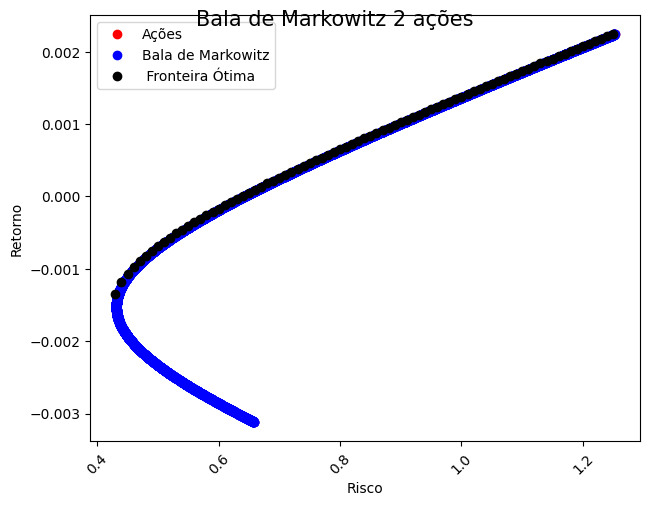

In [ ]:
plt.plot(ativ_eixo_x,ativ_eixo_y,'o',color="red", label = 'Ações')
plt.plot(cart_eixo_x,cart_eixo_y,"o",color="blue", label = 'Bala de Markowitz')
plt.plot(cart_ot_eixo_x, cart_ot_eixo_y, 'o', color='black', label = ' Fronteira Ótima')
plt.tight_layout()
plt.suptitle('Bala de Markowitz 2 ações', fontsize=15)
plt.xticks(fontsize=10, rotation=45)
plt.yticks(fontsize=10)
plt.xlabel("Risco")
plt.ylabel("Retorno")
plt.legend()
plt.show()